In [1]:
import sys
sys.path.append("../..")


from experiments.plt_pab_fae import plt_fab_fae
from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.BB84TrainableProtocol import BB84TrainableProtocol
from protocol.connection_elements.Layer import SeparableLayer, EntangledLayer
from protocol.BB84Protocol import BB84Protocol
from protocol.connection_elements.MultiQubitQCLEve import MultiQubitQCLEve


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


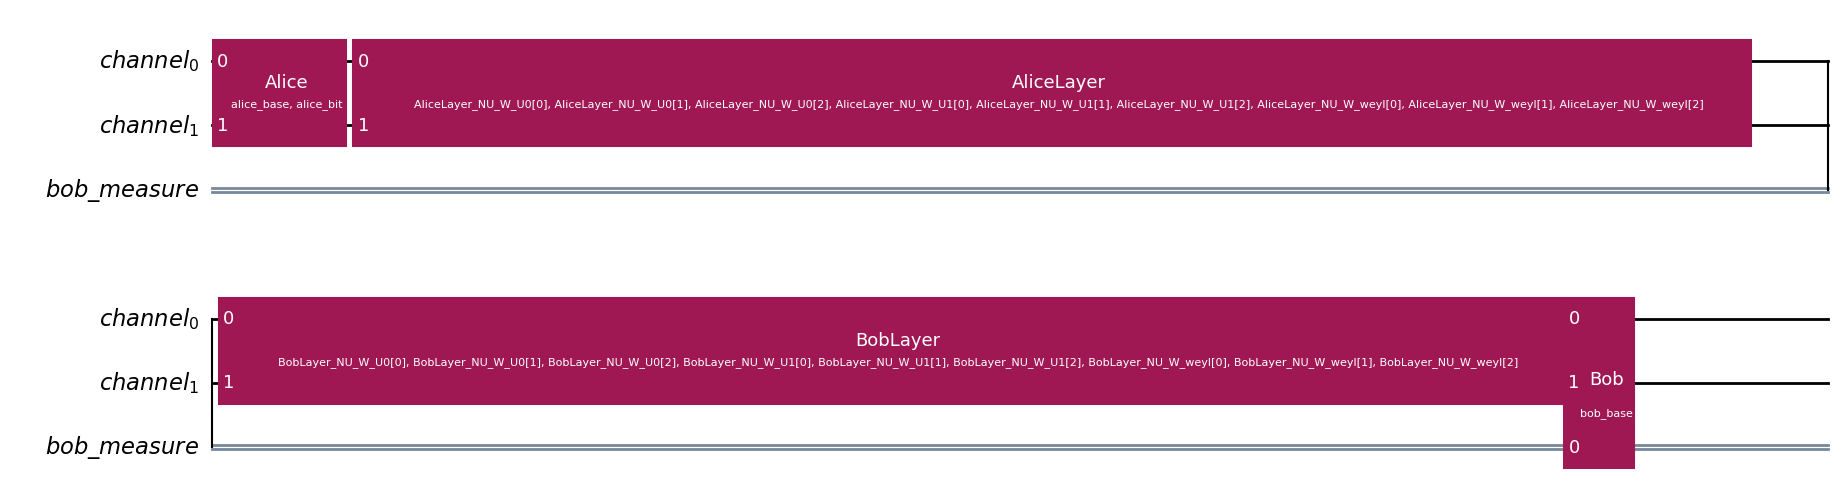

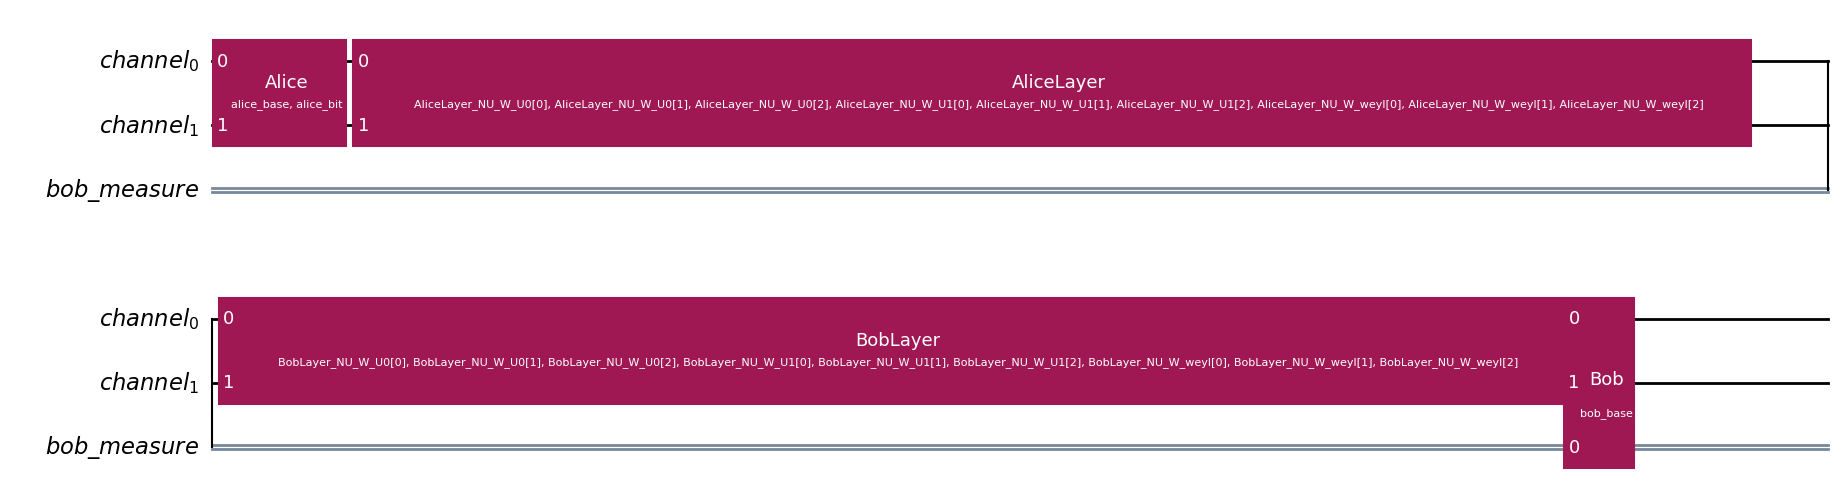

In [2]:
layers = [EntangledLayer("AliceLayer"), EntangledLayer("BobLayer")]
eve = MultiQubitQCLEve()

ab_protocol = BB84TrainableProtocol(n_bits=512, elements=layers, channel_size=2, seed=0, learning_rate=0.1)
eve_protocol = BB84EveTrainableProtocol(n_bits=512, elements=[layers[0], eve, layers[1]], channel_size=2,
                                        seed=0, alpha=1)

qc, _ = ab_protocol.qc_with_ctx()
qc.draw("mpl", expr_len=3)

In [3]:
def train_eve():
    bob_qber, eve_qber = [], []
    qber = eve_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(qber['eve_qber'])
    print(f'start QBER: {qber}')
    for epoch in range(50):
        loss = eve_protocol.train()
        qber = eve_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(qber['eve_qber'])
        if epoch % 5 == 0 or epoch == 49:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

def train_ab():
    bob_qber, eve_qber = [], []
    qber = ab_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(0.5)
    print(f'start QBER: {qber}')
    for epoch in range(20):
        loss = ab_protocol.train()
        qber = ab_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(0.5)
        if epoch % 5 == 0 or epoch == 19:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

# Krok 1 - trenowanie Alice i Boba do początkowego stanu
Uczymy Alice i Boba bez Eve, aby miały sensowne parametry początkowe i potrafiły przekazywać sobie dane.

In [4]:
b_q, e_q = train_ab()

start QBER: {'bob_qber': np.float64(0.5158730158730158)}
epoch: 0, loss: -0.4415559768676758, QBER: {'bob_qber': np.float64(0.47619047619047616)}
epoch: 5, loss: -0.864238440990448, QBER: {'bob_qber': np.float64(0.059523809523809534)}
epoch: 10, loss: -0.9243040084838867, QBER: {'bob_qber': np.float64(0.04365079365079361)}
epoch: 15, loss: -0.9509972333908081, QBER: {'bob_qber': np.float64(0.06349206349206349)}
epoch: 19, loss: -0.9818655252456665, QBER: {'bob_qber': np.float64(0.0)}


<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

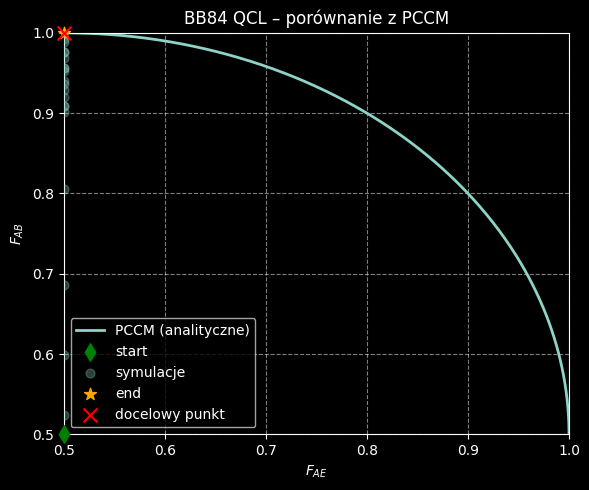

In [5]:
plt_fab_fae(b_q, e_q, 1)

# Krok 2 - trenowanie tylko Eve, warstwy Alice i Boba zamrożone
Uczymy samą Eve, docelowa dokładność Boba to 0.8. Startujemy od parametrów Alice i Boba wytrenowanych w poprzednim kroku i Eve jako identyczność.

In [6]:
eve_protocol.set_parameters(ab_protocol.get_all_parameters())

params = eve_protocol.get_all_parameters()
for p in eve.nu.params():
    k = p.name
    params[k] = 0

eve_protocol.set_parameters(params)
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(0.0), 'NU_W_0_0_U0[1]': np.float32(0.0), 'NU_W_0_0_U0[2]': np.float32(0.0), 'NU_W_0_0_U1[0]': np.float32(0.0), 'NU_W_0_0_U1[1]': np.float32(0.0), 'NU_W_0_0_U1[2]': np.float32(0.0), 'NU_W_0_0_weyl[0]': np.float32(0.0), 'NU_W_0_0_weyl[1]': np.float32(0.0), 'NU_W_0_0_weyl[2]': np.float32(0.0), 'NU_W_0_1_U0[0]': np.float32(0.0), 'NU_W_0_1_U0[1]': np.float32(0.0), 'NU_W_0_1_U0[2]': np.float32(0.0), 'NU_W_0_1_U1[0]': np.float32(0.0), 'NU_W_0_1_U1[1]': np.float32(0.0), 'NU_W_0_1_U1[2]': np.float32(0.0), 'NU_W_0_1_weyl[0]': np.float32(0.0), 'NU_W_0_1_weyl[1]': np.float32(0.0), 'NU_W_0_1_weyl[2]': np.float32(0.0), 'NU_W_1_0_U0[0]': np.float32(0.0), 'NU_W_1_0_U0[1]': np.float32(0.0), 'NU_W_1_0_U0[2]': np.float32(0.0), 'NU_W_1_0_U1[0]': np.float32(0.0), 'NU_W_1_0_U1[1]': np.float32(0.0), 'NU_W_1_0_U1[2]': np.float32(0.0), 'NU_W_1_0_weyl[0]': np.float32(0.0), 'NU_W_1_0_weyl[1]': np.float32(0.0), 'NU_W_1_0_weyl[2]': np.float32(0.0), 'NU_W_2_0_U0[0

In [7]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss7
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.011029411764705843), 'eve_qber': np.float64(0.5441176470588236)}
epoch: 0, loss: -0.578202486038208, QBER: {'bob_qber': np.float64(0.0845588235294118), 'eve_qber': np.float64(0.5294117647058824)}
epoch: 5, loss: -0.5806396007537842, QBER: {'bob_qber': np.float64(0.011029411764705843), 'eve_qber': np.float64(0.5110294117647058)}
epoch: 10, loss: -0.6228857636451721, QBER: {'bob_qber': np.float64(0.022058823529411797), 'eve_qber': np.float64(0.4191176470588235)}
epoch: 15, loss: -0.7594007849693298, QBER: {'bob_qber': np.float64(0.13970588235294112), 'eve_qber': np.float64(0.2867647058823529)}
epoch: 20, loss: -1.008481740951538, QBER: {'bob_qber': np.float64(0.23529411764705888), 'eve_qber': np.float64(0.15808823529411764)}
epoch: 25, loss: -1.0013141632080078, QBER: {'bob_qber': np.float64(0.2095588235294118), 'eve_qber': np.float64(0.17279411764705888)}
epoch: 30, loss: -1.0354843139648438, QBER: {'bob_qber': np.float64(0.25735294117647056), 'eve_

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

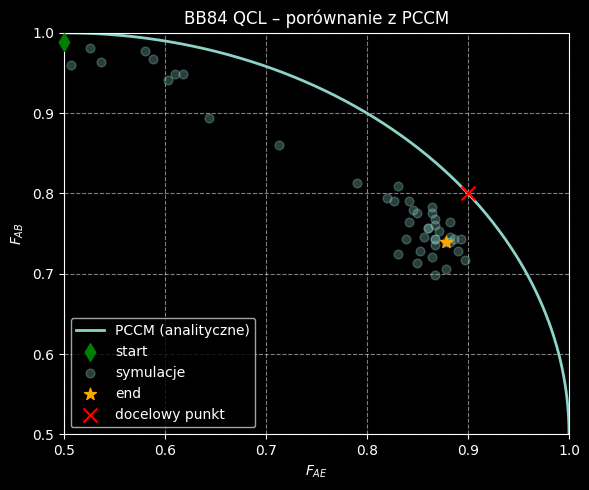

In [8]:
plt_fab_fae(b_q, e_q, 0.8)

# Krok 3 - trenowanie warstw Alice i Boba, Eve zamrożona
Próbujemy uczyć Alice i Boba z użyciem nowej funkcji straty, która maksymalizuje jedynie dokładność Boba.

In [9]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(-0.04097399), 'AliceLayer_NU_W_U0[1]': np.float32(0.7933444), 'AliceLayer_NU_W_U0[2]': np.float32(0.8648113), 'AliceLayer_NU_W_U1[0]': np.float32(0.03979633), 'AliceLayer_NU_W_U1[1]': np.float32(-0.24823907), 'AliceLayer_NU_W_U1[2]': np.float32(0.5941435), 'AliceLayer_NU_W_weyl[0]': np.float32(-0.3679773), 'AliceLayer_NU_W_weyl[1]': np.float32(0.22857709), 'AliceLayer_NU_W_weyl[2]': np.float32(0.96493787), 'BobLayer_NU_W_U0[0]': np.float32(-0.01302712), 'BobLayer_NU_W_U0[1]': np.float32(1.3487792), 'BobLayer_NU_W_U0[2]': np.float32(1.0030179), 'BobLayer_NU_W_U1[0]': np.float32(-0.003192652), 'BobLayer_NU_W_U1[1]': np.float32(0.17427048), 'BobLayer_NU_W_U1[2]': np.float32(0.5061604), 'BobLayer_NU_W_weyl[0]': np.float32(-0.512894), 'BobLayer_NU_W_weyl[1]': np.float32(0.3210979), 'BobLayer_NU_W_weyl[2]': np.float32(1.2214192)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(0.08975308), 'NU_W_0_0_U0[1]': np.float32(0.09028731), '

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [10]:
eve_loss = eve_protocol.loss
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.26102941176470584), 'eve_qber': np.float64(0.12132352941176472)}
epoch: 0, loss: -0.7843000888824463, QBER: {'bob_qber': np.float64(0.2279411764705882), 'eve_qber': np.float64(0.15441176470588236)}
epoch: 5, loss: -0.9032809734344482, QBER: {'bob_qber': np.float64(0.09191176470588236), 'eve_qber': np.float64(0.3713235294117647)}
epoch: 10, loss: -0.9323764443397522, QBER: {'bob_qber': np.float64(0.0625), 'eve_qber': np.float64(0.4816176470588235)}
epoch: 15, loss: -0.9532625675201416, QBER: {'bob_qber': np.float64(0.05514705882352944), 'eve_qber': np.float64(0.5257352941176471)}
epoch: 20, loss: -0.9500077962875366, QBER: {'bob_qber': np.float64(0.03308823529411764), 'eve_qber': np.float64(0.48897058823529416)}
epoch: 25, loss: -0.9618331789970398, QBER: {'bob_qber': np.float64(0.03676470588235292), 'eve_qber': np.float64(0.44485294117647056)}
epoch: 30, loss: -0.9611467123031616, QBER: {'bob_qber': np.float64(0.0404411764705882), 'eve_qber': np.fl

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

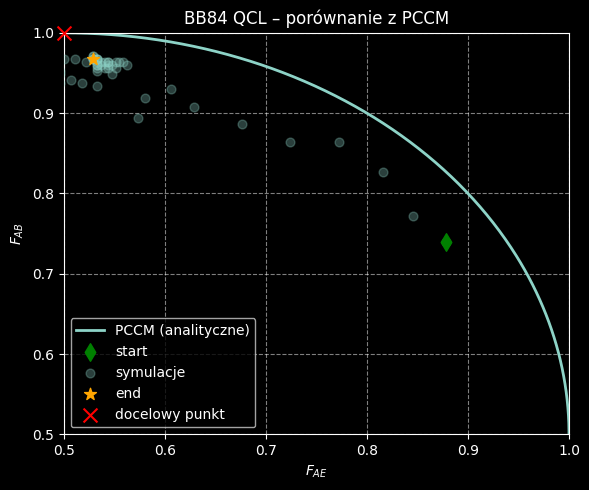

In [11]:
plt_fab_fae(b_q, e_q, 1)

In [12]:
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(0.08975308), 'NU_W_0_0_U0[1]': np.float32(0.09028731), 'NU_W_0_0_U0[2]': np.float32(0.13377418), 'NU_W_0_0_U1[0]': np.float32(0.73436683), 'NU_W_0_0_U1[1]': np.float32(-0.29901382), 'NU_W_0_0_U1[2]': np.float32(-0.050161287), 'NU_W_0_0_weyl[0]': np.float32(-0.37438193), 'NU_W_0_0_weyl[1]': np.float32(0.2745652), 'NU_W_0_0_weyl[2]': np.float32(0.9903117), 'NU_W_0_1_U0[0]': np.float32(0.35678604), 'NU_W_0_1_U0[1]': np.float32(-0.57150936), 'NU_W_0_1_U0[2]': np.float32(1.8763897e-08), 'NU_W_0_1_U1[0]': np.float32(0.07971807), 'NU_W_0_1_U1[1]': np.float32(-0.08311265), 'NU_W_0_1_U1[2]': np.float32(-1.2889054e-08), 'NU_W_0_1_weyl[0]': np.float32(0.06560011), 'NU_W_0_1_weyl[1]': np.float32(0.02037313), 'NU_W_0_1_weyl[2]': np.float32(-0.5728146), 'NU_W_1_0_U0[0]': np.float32(-0.2858325), 'NU_W_1_0_U0[1]': np.float32(-0.039792873), 'NU_W_1_0_U0[2]': np.float32(-0.015674226), 'NU_W_1_0_U1[0]': np.float32(-0.36859435), 'NU_W_1_0_U1[1]': np.floa

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [13]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss7
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.03308823529411764), 'eve_qber': np.float64(0.47058823529411764)}
epoch: 0, loss: -0.6093927621841431, QBER: {'bob_qber': np.float64(0.13970588235294112), 'eve_qber': np.float64(0.2977941176470589)}
epoch: 5, loss: -1.042028546333313, QBER: {'bob_qber': np.float64(0.21691176470588236), 'eve_qber': np.float64(0.11029411764705888)}
epoch: 10, loss: -1.1332621574401855, QBER: {'bob_qber': np.float64(0.20220588235294112), 'eve_qber': np.float64(0.1654411764705882)}
epoch: 15, loss: -1.1530086994171143, QBER: {'bob_qber': np.float64(0.22058823529411764), 'eve_qber': np.float64(0.125)}
epoch: 20, loss: -1.1478506326675415, QBER: {'bob_qber': np.float64(0.22426470588235292), 'eve_qber': np.float64(0.13235294117647056)}
epoch: 25, loss: -1.1728925704956055, QBER: {'bob_qber': np.float64(0.26102941176470584), 'eve_qber': np.float64(0.09926470588235292)}
epoch: 30, loss: -1.1719297170639038, QBER: {'bob_qber': np.float64(0.25), 'eve_qber': np.float64(0.091911

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

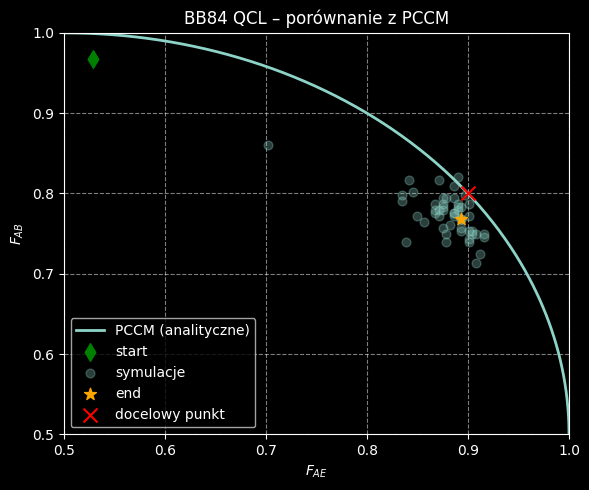

In [14]:
plt_fab_fae(b_q, e_q, 0.8)

In [15]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(0.24276638), 'AliceLayer_NU_W_U0[1]': np.float32(1.1207163), 'AliceLayer_NU_W_U0[2]': np.float32(0.83611965), 'AliceLayer_NU_W_U1[0]': np.float32(-0.42706722), 'AliceLayer_NU_W_U1[1]': np.float32(-0.5154281), 'AliceLayer_NU_W_U1[2]': np.float32(0.5941435), 'AliceLayer_NU_W_weyl[0]': np.float32(0.91386294), 'AliceLayer_NU_W_weyl[1]': np.float32(-0.44899818), 'AliceLayer_NU_W_weyl[2]': np.float32(0.6947444), 'BobLayer_NU_W_U0[0]': np.float32(0.72155774), 'BobLayer_NU_W_U0[1]': np.float32(1.4181604), 'BobLayer_NU_W_U0[2]': np.float32(0.54812306), 'BobLayer_NU_W_U1[0]': np.float32(0.035424035), 'BobLayer_NU_W_U1[1]': np.float32(0.7430349), 'BobLayer_NU_W_U1[2]': np.float32(0.78065884), 'BobLayer_NU_W_weyl[0]': np.float32(-0.16106994), 'BobLayer_NU_W_weyl[1]': np.float32(0.12807073), 'BobLayer_NU_W_weyl[2]': np.float32(1.1753643)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(0.35703334), 'NU_W_0_0_U0[1]': np.float32(0.037332483)

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [16]:
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.23161764705882348), 'eve_qber': np.float64(0.10661764705882348)}
epoch: 0, loss: -0.7950820922851562, QBER: {'bob_qber': np.float64(0.20588235294117652), 'eve_qber': np.float64(0.125)}
epoch: 5, loss: -0.8708616495132446, QBER: {'bob_qber': np.float64(0.16176470588235292), 'eve_qber': np.float64(0.23529411764705888)}
epoch: 10, loss: -0.9242769479751587, QBER: {'bob_qber': np.float64(0.0404411764705882), 'eve_qber': np.float64(0.40808823529411764)}
epoch: 15, loss: -0.9577423334121704, QBER: {'bob_qber': np.float64(0.05514705882352944), 'eve_qber': np.float64(0.5183823529411764)}
epoch: 20, loss: -0.9653304219245911, QBER: {'bob_qber': np.float64(0.0404411764705882), 'eve_qber': np.float64(0.5441176470588236)}
epoch: 25, loss: -0.9711744785308838, QBER: {'bob_qber': np.float64(0.03308823529411764), 'eve_qber': np.float64(0.5404411764705883)}
epoch: 30, loss: -0.9685468673706055, QBER: {'bob_qber': np.float64(0.03308823529411764), 'eve_qber': np.flo

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

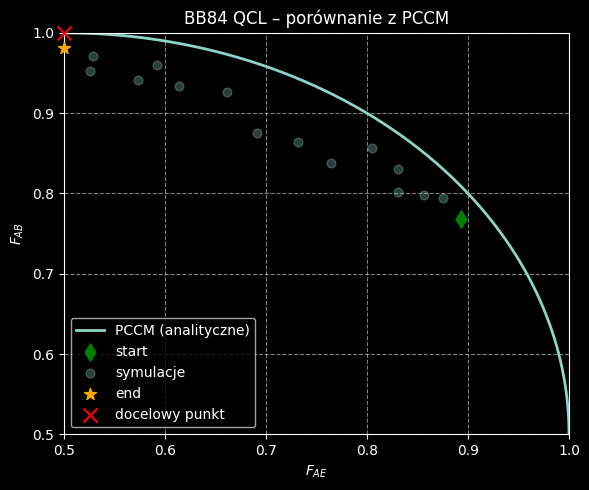

In [17]:
plt_fab_fae(b_q, e_q, 1)

In [18]:
print("All parameters:", eve_protocol.get_all_parameters())

All parameters: {'NU_W_0_0_U0[0]': np.float32(0.35703334), 'NU_W_0_0_U0[1]': np.float32(0.037332483), 'NU_W_0_0_U0[2]': np.float32(0.08998598), 'NU_W_0_0_U1[0]': np.float32(1.2834488), 'NU_W_0_0_U1[1]': np.float32(-0.4211584), 'NU_W_0_0_U1[2]': np.float32(-0.024103744), 'NU_W_0_0_weyl[0]': np.float32(-0.41141215), 'NU_W_0_0_weyl[1]': np.float32(0.42169484), 'NU_W_0_0_weyl[2]': np.float32(1.386071), 'NU_W_0_1_U0[0]': np.float32(0.29255688), 'NU_W_0_1_U0[1]': np.float32(-0.5665252), 'NU_W_0_1_U0[2]': np.float32(1.4600678e-08), 'NU_W_0_1_U1[0]': np.float32(-0.05325198), 'NU_W_0_1_U1[1]': np.float32(-0.38149863), 'NU_W_0_1_U1[2]': np.float32(-1.2889054e-08), 'NU_W_0_1_weyl[0]': np.float32(-0.015474467), 'NU_W_0_1_weyl[1]': np.float32(-0.028766861), 'NU_W_0_1_weyl[2]': np.float32(-0.50170046), 'NU_W_1_0_U0[0]': np.float32(0.028473156), 'NU_W_1_0_U0[1]': np.float32(-0.18544576), 'NU_W_1_0_U0[2]': np.float32(-0.16621336), 'NU_W_1_0_U1[0]': np.float32(-0.44357884), 'NU_W_1_0_U1[1]': np.float32

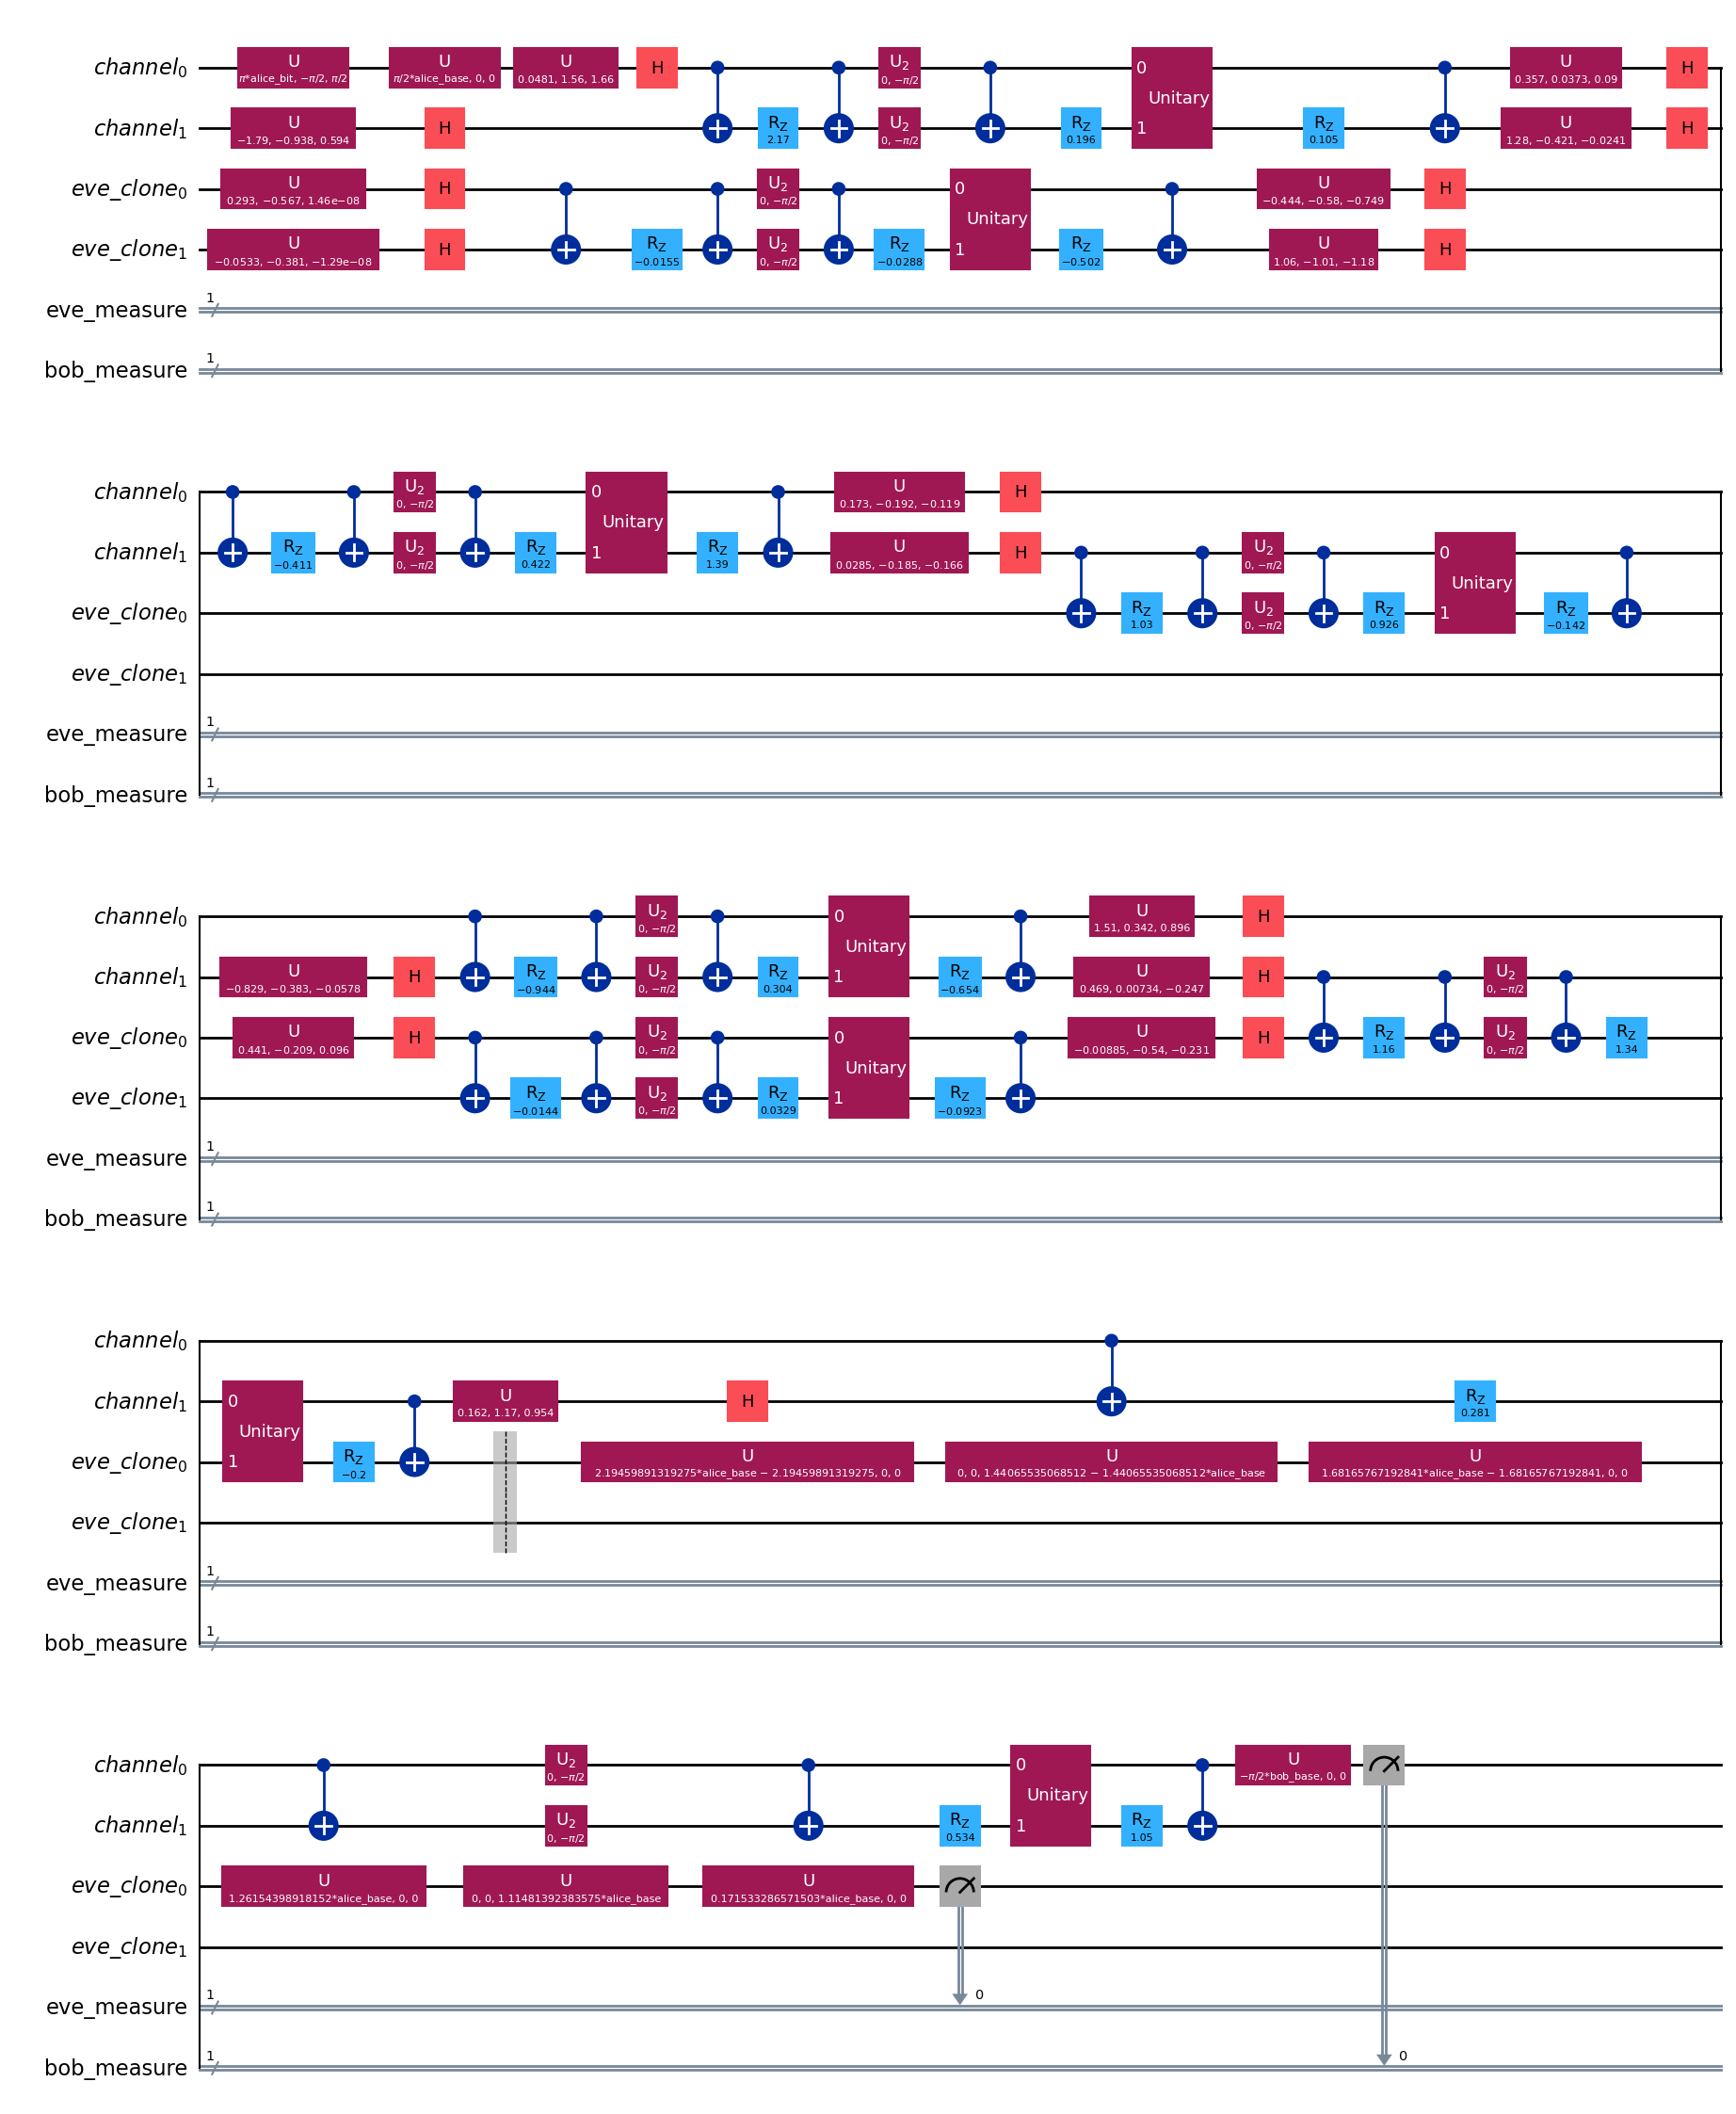

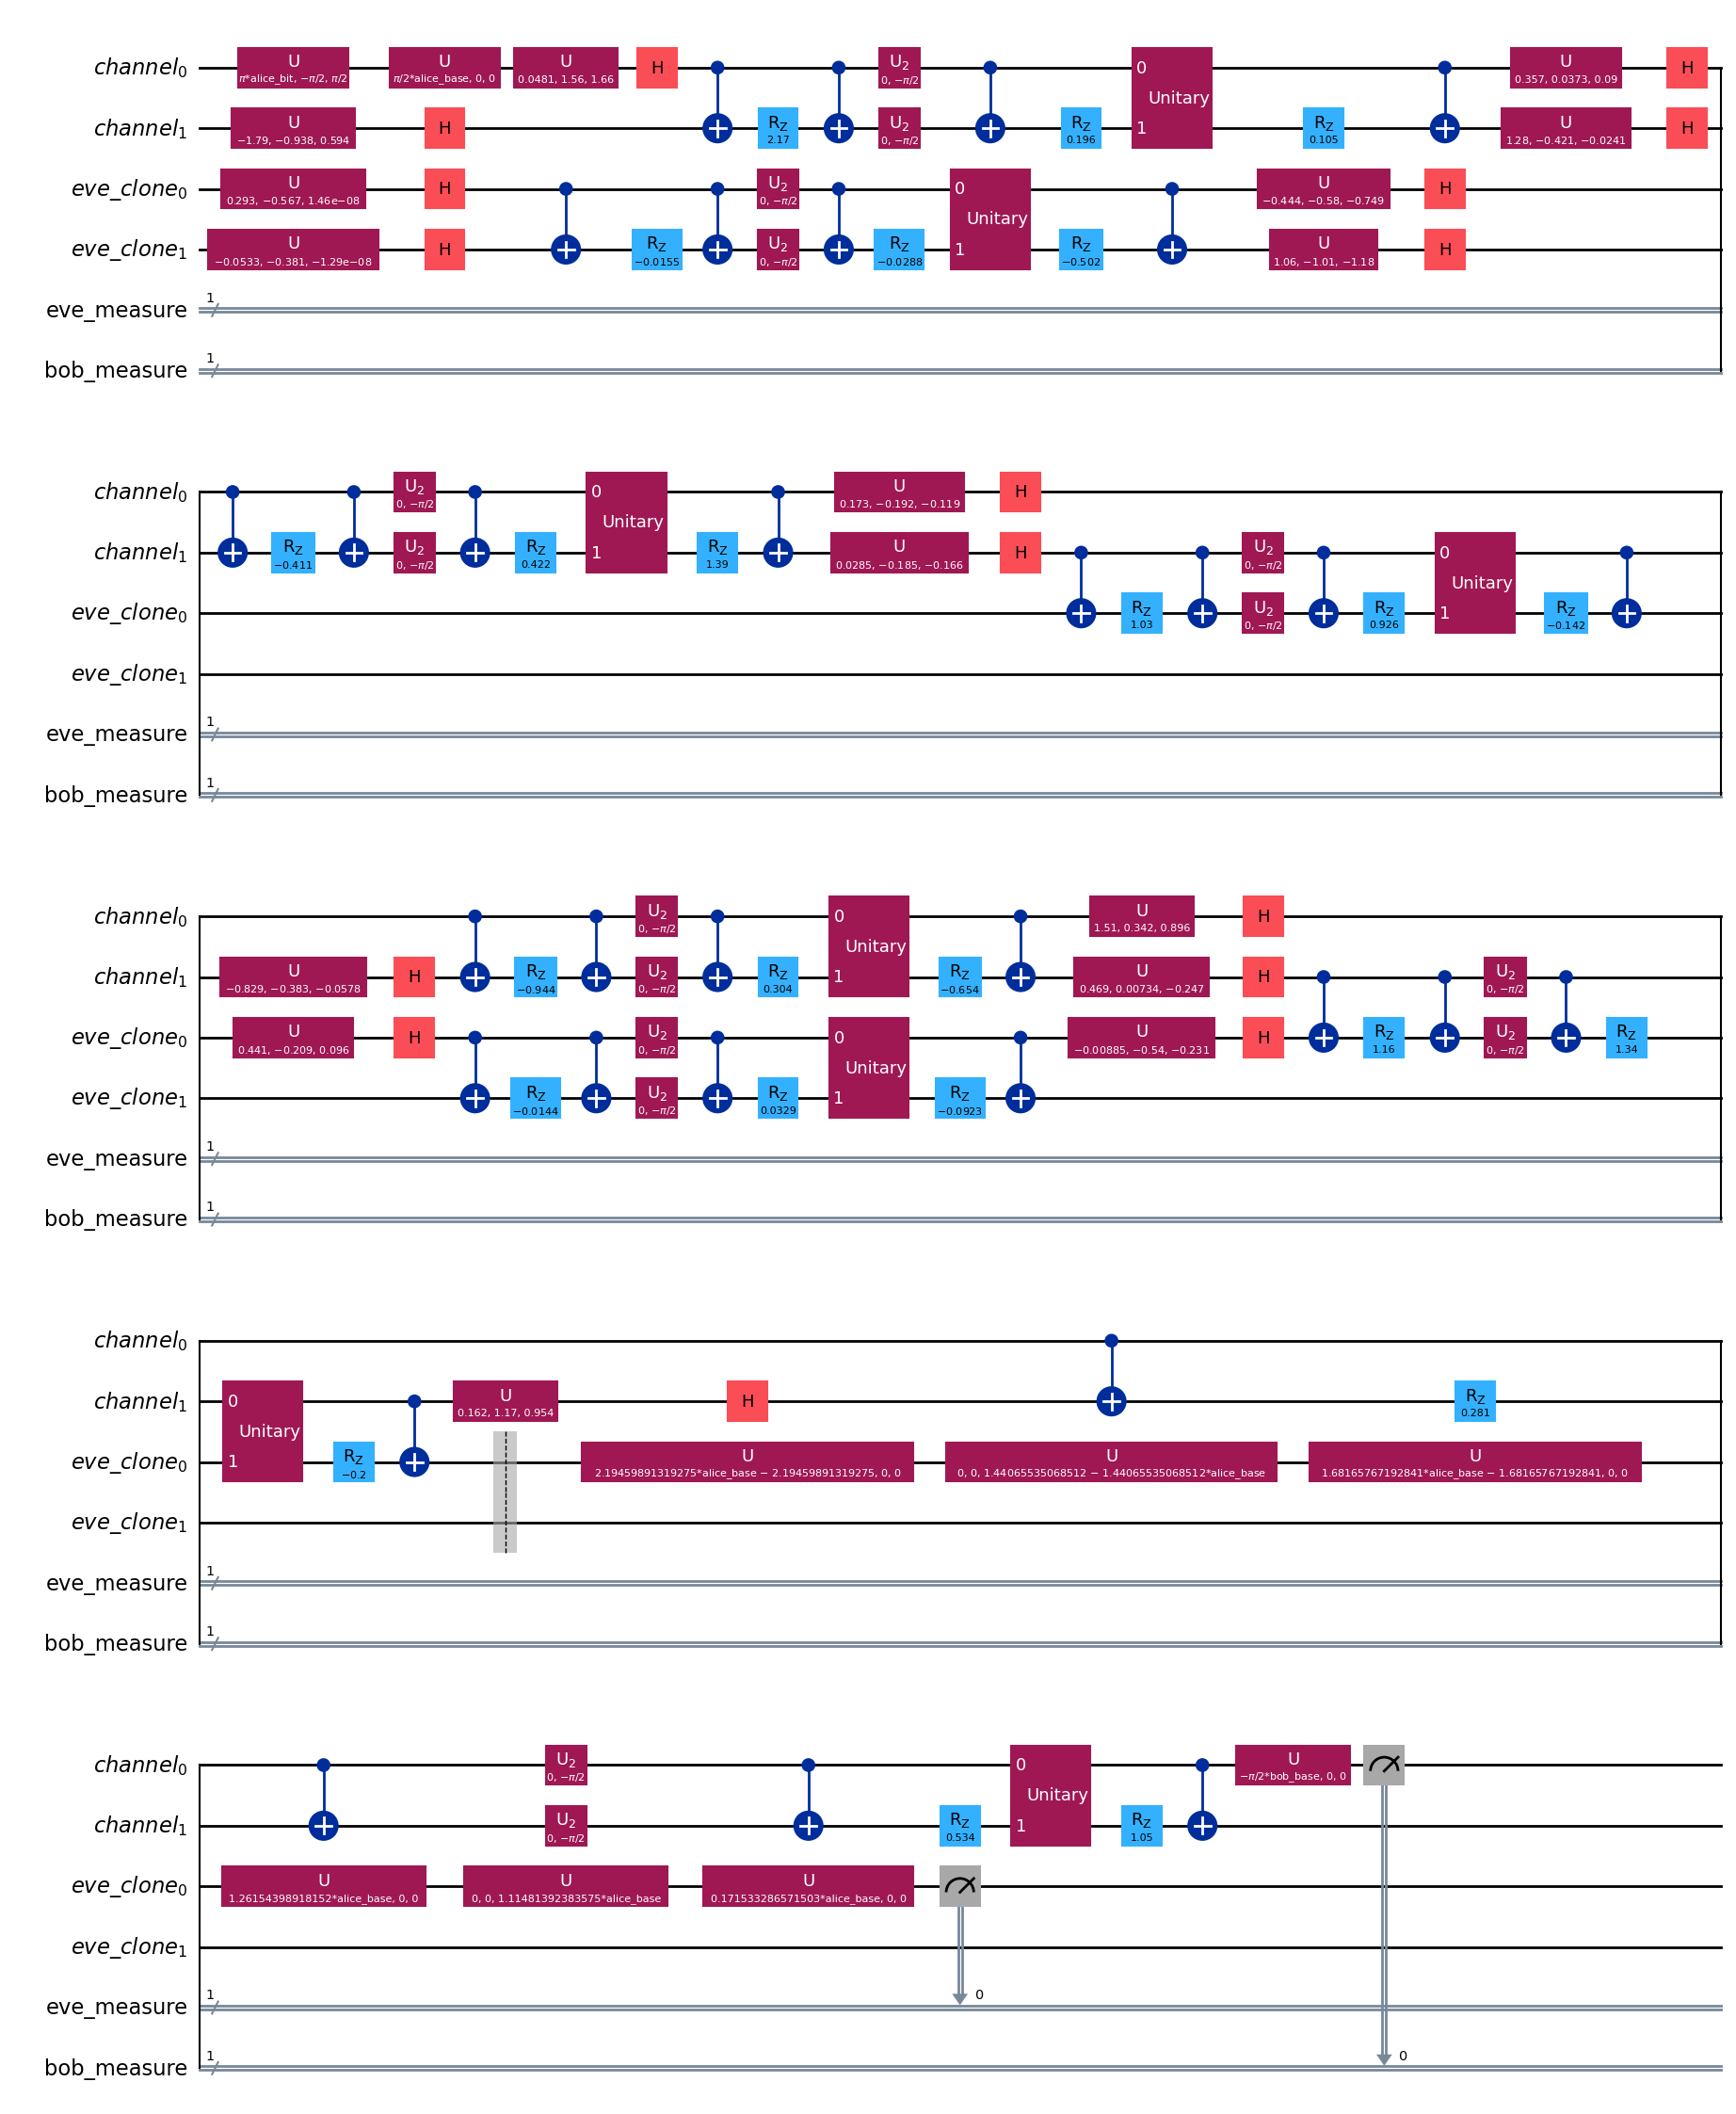

In [19]:
eve_protocol._qc.assign_parameters(eve_protocol.get_all_parameters()).draw("mpl")